In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import warnings
import seaborn as sns
warnings.warn("once")

/home/filippo/anaconda3/envs/3_6_data_science/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: once
  


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
% matplotlib inline

In [3]:
linear_model_df = pd.read_csv(os.path.join('data','linear_regression_model'))

In [4]:
X = linear_model_df[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = linear_model_df['Y']

In [5]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.0259552875382425

In [6]:
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error')
-scores

array([478.43150415, 144.05879484, 487.47190313])

#Lasso

In [7]:
d = {'alpha': [1e-4, 1e-3, 1e-2, .1]}
clf = GridSearchCV(Lasso(), d, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

-6.743 (+/-22.274) for {'alpha': 0.0001}
-6.743 (+/-22.280) for {'alpha': 0.001}
-6.751 (+/-22.337) for {'alpha': 0.01}
-6.857 (+/-22.914) for {'alpha': 0.1}


In [9]:
clf = Lasso(alpha = .1)
clf.fit(X,y)

for tup in (list(zip(X.columns,clf.coef_))):
    print(tup)


('X1', -9.179277136481613)
('X2', 8.371528462982958e-06)
('X3', -0.00608128159547475)
('X4', -0.006747321605872683)
('X5', 0.06970302952556762)
('X6', 7.082831838697684e-09)
('X7', -1.5704231733728547e-07)
('X8', 5.8578484268101187e-08)


# Lasso on best model

In [10]:
best_model_df = pd.read_csv(os.path.join('data','best_linear_regression_model'))

In [11]:
best_model_df.head()

,Unnamed: 0,Y,X3,X4,X5,X7,X8,X1*X5,X2*X3,X4*X5
0,0,17,86.0,517.0,176.0,134218018.0,166200000.0,128.48,12050062.0,90992.0
1,1,11,68.5,260.0,106.0,27107960.0,27107960.0,68.90,2920497.5,27560.0
2,2,11,68.5,260.0,106.0,27107960.0,27107960.0,68.90,2920497.5,27560.0
3,3,11,68.5,16.0,10.0,15934737.0,15934737.0,6.10,78021.5,160.0
4,4,8,87.0,277.0,127.0,108185706.0,108185706.0,86.36,7443111.0,35179.0


In [12]:
X = best_model_df[['X3','X4','X5','X7','X8','X1*X5','X2*X3','X4*X5']]

In [13]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.47625255443607406

In [14]:
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error')
-scores

array([534.83829586, 286.44040069, 486.12362484])

In [15]:
d = {'alpha': [1e-4, 1e-3, 1e-2, .1]}
clf = GridSearchCV(Lasso(max_iter= 10000), d, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    

In [17]:
clf = Lasso(max_iter=10000, alpha = .01)
clf.fit(X,y)

for tup in (list(zip(X.columns,clf.coef_))):
    print(tup)


('X3', -0.04501126652731938)
('X4', -0.016469619193075567)
('X5', 0.1453803008530245)
('X7', -1.520714250230516e-07)
('X8', 5.9430534376174546e-08)
('X1*X5', -0.12505794903602216)
('X2*X3', 2.774688266271181e-07)
('X4*X5', 1.5777754103221374e-05)


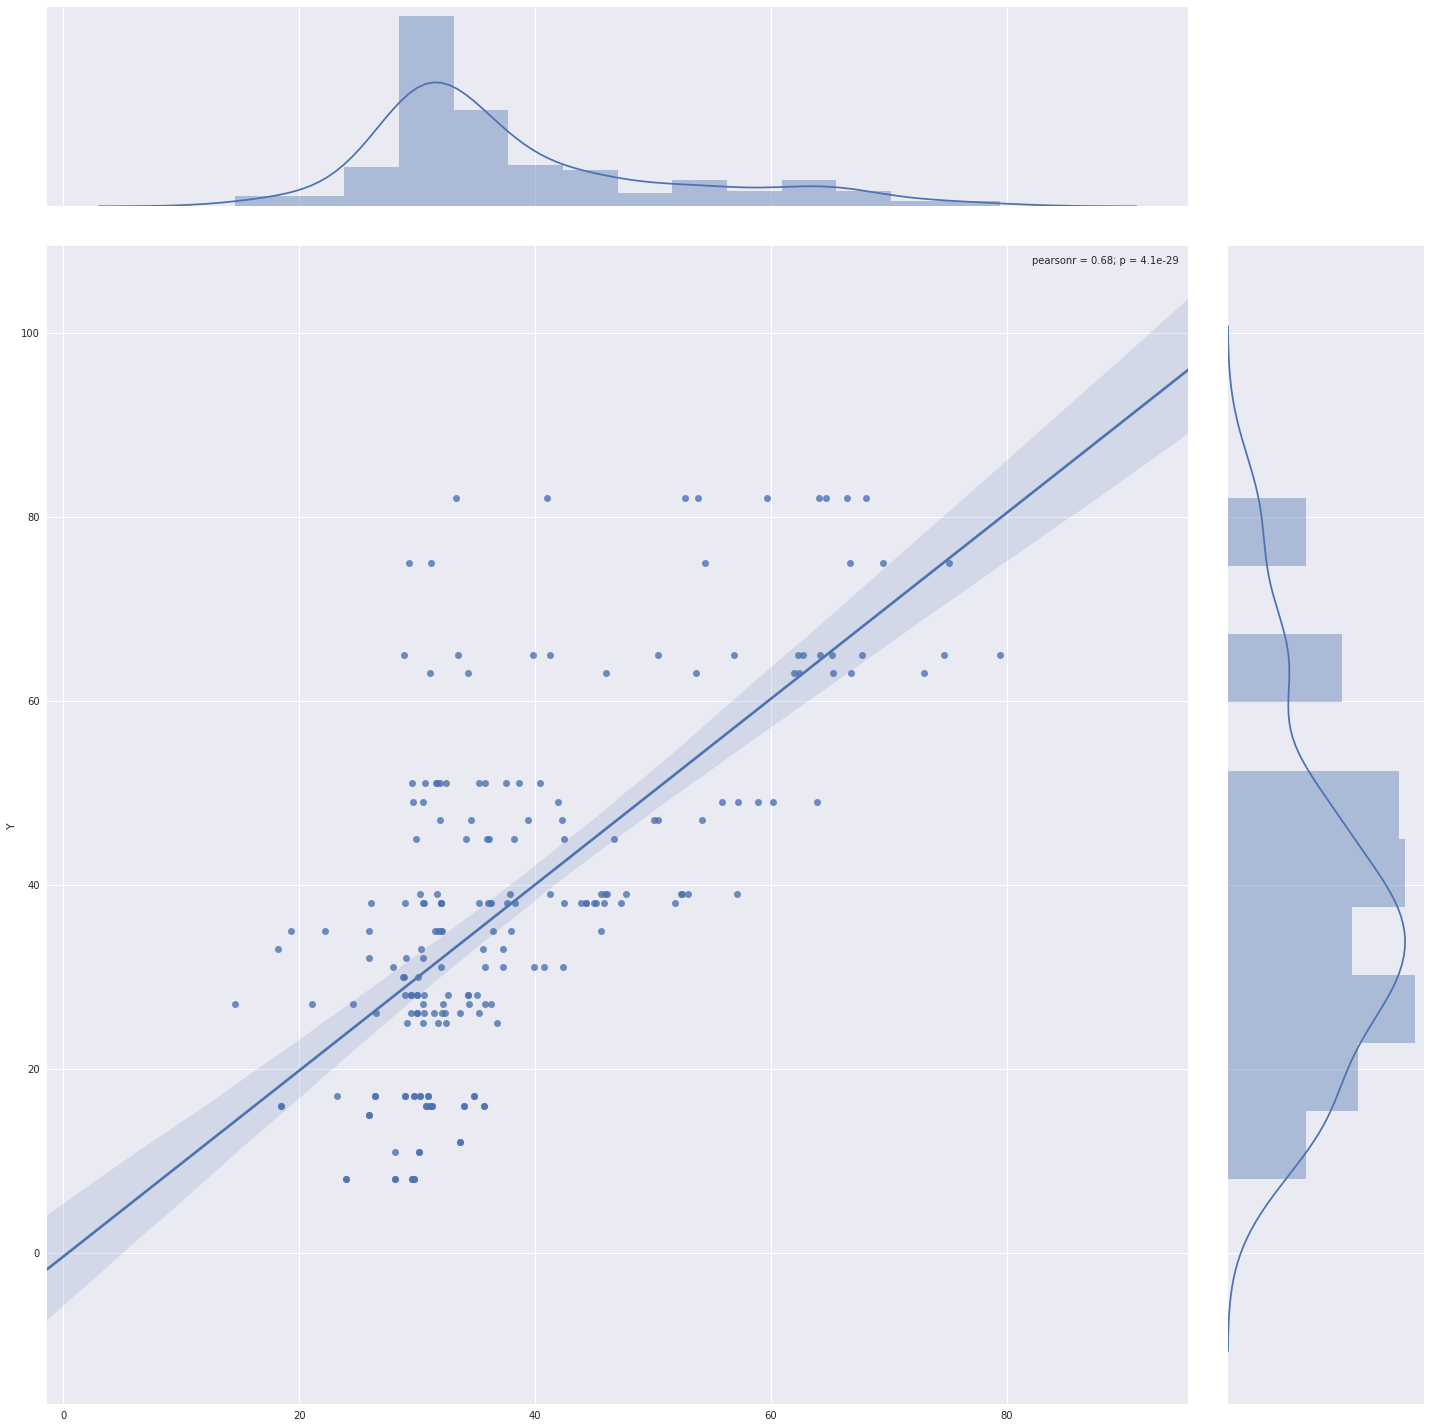

In [21]:
preds = lr.predict(X)
sns.set(color_codes=True)
sns.jointplot(preds,y, kind='regplot', size= 20)